In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from datetime import datetime, timezone
import ast  
from collections import defaultdict

In [2]:
contract_interact = pd.read_parquet('contract_interact.parquet', engine='pyarrow')
contract_interact.head()

,user,contract_address,count
index,,,
0,0x978aad63fe35f7a72573c411c3dff53608aaeac9,0x5d3a536e4d6dbd6114cc1ead35777bab948e3643,5
1,0xdfdbc9fe64f3020b8440deb6c5db544a89aaaf04,0x39aa39c021dfbae8fac545936693ac917d5e7563,1
2,0xba07e5cb42ca05d2fc3d96514461d7245050eb7b,0x39aa39c021dfbae8fac545936693ac917d5e7563,1
3,0x50aeee21369e2a4d95eb8784da49645f927adf54,0xb3319f5d18bc0d84dd1b4825dcde5d5f7266d407,1
4,0xe6a6ee4196d361ec4f6d587c7ebe20c50667fb39,0x8e595470ed749b85c6f7669de83eae304c2ec68f,1


In [118]:
grouped_df_sum_con = contract_interact.groupby('user')['count'].sum().reset_index()

# Display the result
grouped_df_sum_con.head()

,user,count
0,0x00000000000030e5959659622cb7eb50aa20ee52,1
1,0x000000000002e33d9a86567c6dfe6d92f6777d1e,36
2,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,16
3,0x00000000005ef87f8ca7014309ece7260bbcdaeb,1
4,0x00000000051cbce3fd04148cce2c0adc7c651829,4


In [5]:
#User interact bao nhieu lan
top_20_rows_sum = grouped_df_sum_con.nlargest(20, 'count')
print("20 most interactive user (to contract address)")
print(top_20_rows_sum)

20 most interactive user (to contract address)
                                             user  count
7809   0x2008b6c3d07b061a84f790c035c2f6dc11a0be70  23719
24273  0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675  16258
8454   0x22ba2662ccf6a0191675bed265a0f295669a0d1e  13769
33961  0x8eb2283f696f2a130134d46e28d3528e19e16868  11160
51487  0xd83eb40979ca0dabe945e22629a72765dc9a39bd   9455
27858  0x74dec05e5b894b0efec69cdf6316971802a2f9a1   8418
46919  0xc4cc364706fe781fb00a47badb297af36a482cc1   8364
48670  0xcc88036fa05c86129bf66260c2a905ab2c7b663c   8119
7918   0x208b82b04449cd51803fae4b1561450ba13d9510   5892
56263  0xecded8b1c603cf21299835f1dfbe37f10f2a29af   5595
20530  0x56178a0d5f301baf6cf3e1cd53d9863437345bf9   5565
48971  0xcdd37ada79f589c15bd4f8fd2083dc88e34a2af2   5237
45479  0xbec69dfce4c1fa8b7843fee1ca85788d84a86b06   5027
53110  0xdf1f6587aa741ff62cabb9bed8dad062713cf3ec   4860
6013   0x18be4c0fadb9df2f6bf94a595a78adf4b2f9627a   4206
29     0x0000db5c8b030ae20308ac975898e097

C:\Users\Admin\AppData\Local\Temp\ipykernel_7164\740283138.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


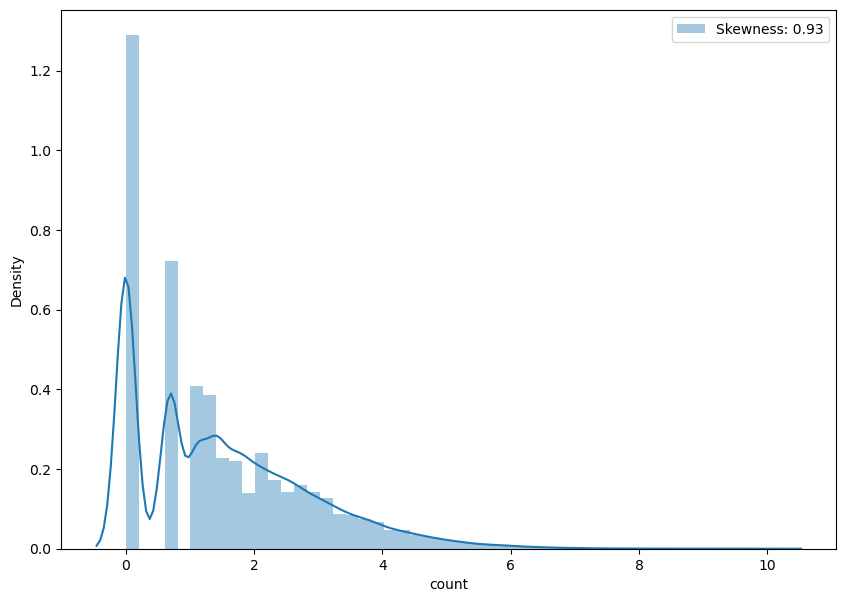

In [6]:
Log_Fare = grouped_df_sum_con['count'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(10, 7))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

In [7]:
sorted_values_sum_con = np.sort(grouped_df_sum_con["count"])
total_sum_con = np.sum(grouped_df_sum_con["count"])
total_sum_con

1179369

In [9]:
sorted_values_sum_con.shape

(60770,)

In [20]:
low_interactive_user_con = []
current_sum = 0
target_sum = total_sum_con*0.04
for element in sorted_values_sum_con:
    if current_sum + element <= target_sum:
        low_interactive_user_con.append(element)
        current_sum += element
    else:
        break

low_interactive_user_con = np.array(low_interactive_user_con)
print(low_interactive_user_con[0], low_interactive_user_con[-1])
low_interactive_user_con.shape

1 3


(29195,)

In [47]:
grouped_df_sum_con.sort_values("count")

,user,count
0,0x00000000000030e5959659622cb7eb50aa20ee52,1
42405,0xb19d5b6818179ec9fde5b60f3c9d1ef381937f4c,1
42407,0xb19f09feacb106bf10cfb20806fddc5e7410cace,1
42409,0xb19fbcfaebb5eb4def32649d548f33f52ea1ab8c,1
42412,0xb1a1010359723aea26892da1a19bafd2a1b930cb,1
...,...,...
51487,0xd83eb40979ca0dabe945e22629a72765dc9a39bd,9455
33961,0x8eb2283f696f2a130134d46e28d3528e19e16868,11160
8454,0x22ba2662ccf6a0191675bed265a0f295669a0d1e,13769
24273,0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675,16258


In [122]:
grouped_df_sum_con.sort_values("count")["count"].values[29195+22695:29195+22695+5]

array([20, 20, 20, 20, 20], dtype=int64)

In [53]:
low_interact_with_contract = grouped_df_sum_con.sort_values("count")["user"][:29195].values
medium_interact_with_contract = grouped_df_sum_con.sort_values("count")["user"][29195:29195+22695].values
high_interact_with_contract = grouped_df_sum_con.sort_values("count")["user"][29195+22695:].values

In [22]:
medium_interactive_user_con = []
current_sum = 0
target_sum = total_sum_con*0.16
for element in sorted_values_sum_con[29195:]:
    if current_sum + element <= target_sum:
        medium_interactive_user_con.append(element)
        current_sum += element
    else:
        break

medium_interactive_user_con = np.array(medium_interactive_user_con)
print(medium_interactive_user_con[0], medium_interactive_user_con[-1])
medium_interactive_user_con.shape

3 20


(22695,)

In [24]:
high_interactive_user_con = []
current_sum = 0
target_sum = total_sum_con*0.80
for element in sorted_values_sum_con[29195+22695:]:
    if current_sum + element <= target_sum:
        high_interactive_user_con.append(element)
        current_sum += element
    else:
        break

high_interactive_user_con = np.array(high_interactive_user_con)
print(high_interactive_user_con[0], high_interactive_user_con[-1])

high_interactive_user_con.shape

20 16258


(8879,)

In [88]:
grouped_df_count_con = contract_interact.groupby('user')['count'].count().reset_index()

# Display the result
grouped_df_count.head()

,user,count
0,0x00000000000030e5959659622cb7eb50aa20ee52,69
1,0x00000000000124d994209fbb955e0217b5c2eca1,316
2,0x000000000002e33d9a86567c6dfe6d92f6777d1e,5
3,0x000000000004d7463d0f9c77383600bc82d612f5,2
4,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,1


In [116]:
grouped_df_count_con[grouped_df_count_con["user"] == "0x974CaA59e49682CdA0AD2bbe82983419A2ECC400".lower()]

,user,count


In [90]:
#User interact voi bao nhieu contract_addresses
top_20_rows_count = grouped_df_count_con.nlargest(20, 'count')
print("Top 20 users interacting with the most contract address")
print(top_20_rows_count)

Top 20 users interacting with the most contract address
                                             user  count
11173  0xd4e26683635bf3dc9ead5f31b935c33cc1ce1838     22
10936  0xd0000d82238adc78c8ce213a30f3ae32de7b000d     19
12359  0xecded8b1c603cf21299835f1dfbe37f10f2a29af     18
11995  0xe5350e927b904fdb4d2af55c566e269bb3df1941     17
12493  0xef764bac8a438e7e498c2e5fccf0f174c3e3f8db     17
5367   0x66b870ddf78c975af5cd8edc6de25eca81791de1     15
4221   0x50664ede715e131f584d3e7eaabd7818bb20a068     14
12933  0xf748879edbe8cca140940788163d7be4d2a2e46a     14
613    0x0aff497bd016000185b1c8302fa98a88ff4a4178     13
2573   0x3070f20f86fda706ac380f5060d256028a46ec29     13
3002   0x39978cc40e2d1d7e127050bdfffbb0dfcfaebad0     13
3082   0x3af015f6e3ac79d217198f00ef36af099d223e29     13
5110   0x6199e5fa5f627ffe703291418df9683c3608ab8b     13
6519   0x7c707ea96b204643689042ba0166108a5be84f05     13
6570   0x7d96a6f41fd31c7624f7069415be58b5e3576d34     13
3292   0x3ee505ba316879d246a8fd2

<ipython-input-91-e43508c81da8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


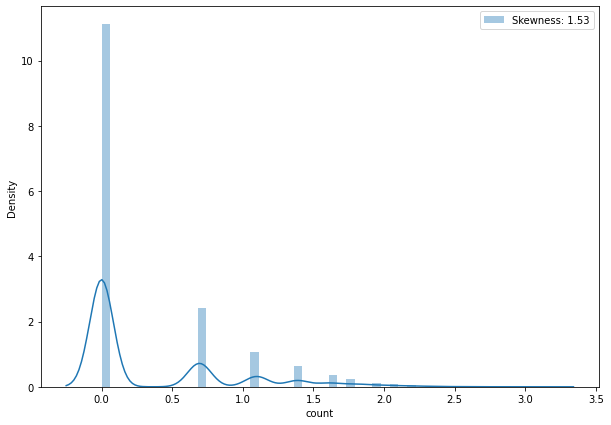

In [91]:
Log_Fare = grouped_df_count_con['count'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(10, 7))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

In [ ]:
low_interactive_user
medium_interactive_user
high_interactive_user
low_interactive_user_to_otheruser
medium_interactive_user_to_otheruser
high_interactive_user_to_otheruser

In [151]:
user_frequency = pd.read_parquet('user_frequency.parquet', engine='pyarrow')
user_frequency.head()

,user,block_timestamp_list,time_frequency
0,0x00000000000030e5959659622cb7eb50aa20ee52,"[1695265151, 1694437151, 1694447951, 169444929...","[25, 36, 41, 15, 31, 30, 35, 18, 18, 21, 15, 2..."
1,0x00000000000124d994209fbb955e0217b5c2eca1,"[1693617395, 1697677991, 1694439443, 169444322...","[178, 186, 173, 199, 195, 202, 244, 223, 226, ..."
2,0x000000000002e33d9a86567c6dfe6d92f6777d1e,"[1700304239, 1700304059, 1695373895, 169432527...","[27, 0, 2, 1, 1, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0,..."
4,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,"[1622335428, 1622568495, 1622545243, 162230253...","[2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, ..."
7,0x00000000005ef87f8ca7014309ece7260bbcdaeb,"[1694830619, 1694975231, 1696143515, 169483085...","[0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


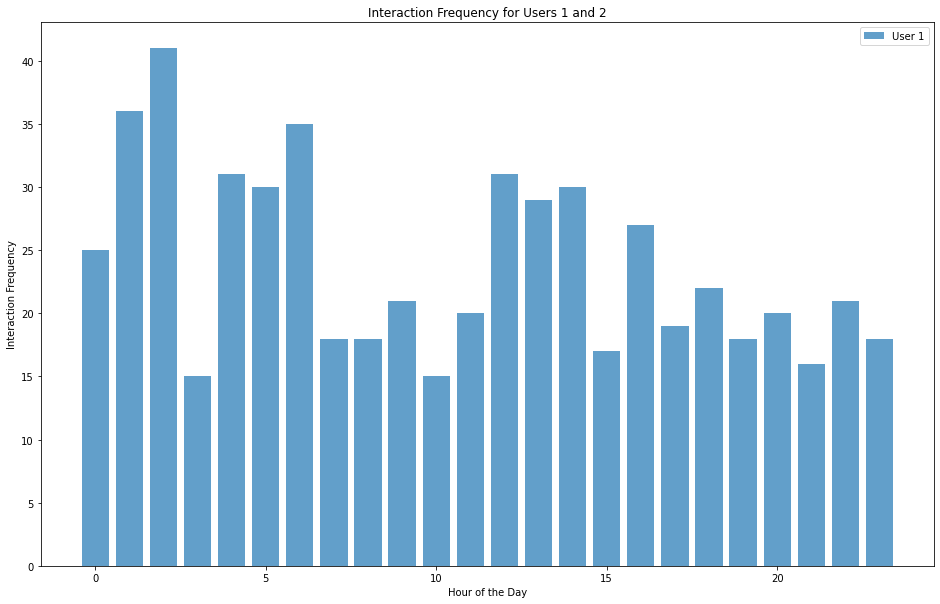

In [13]:
# Selecting data for users 1 and 2
user_1_data = user_frequency.loc[0, 'time_frequency']
# user_2_data = user_frequency.loc[2, 'time_frequency']

# Creating x-axis labels
hours = [i for i in range(24)]

# Plotting the bar chart
plt.figure(figsize=(16, 10))
plt.bar(hours, user_1_data, label='User 1', alpha=0.7)
# plt.bar(hours, user_2_data, label='User 2', alpha=0.7)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Interaction Frequency')
plt.title('Interaction Frequency for Users 1 and 2')
plt.legend()

# Displaying the plot
plt.show()

In [152]:
# Calculate the sum of elements in the same position
sum_time_freq = [sum(x) for x in zip(*user_frequency['time_frequency'])]

print(sum_time_freq)

[343363, 338941, 328573, 316019, 307761, 310730, 303085, 311329, 313090, 315685, 302929, 317037, 325895, 351136, 370477, 376626, 375547, 364466, 351315, 341083, 337629, 322887, 319037, 313534]


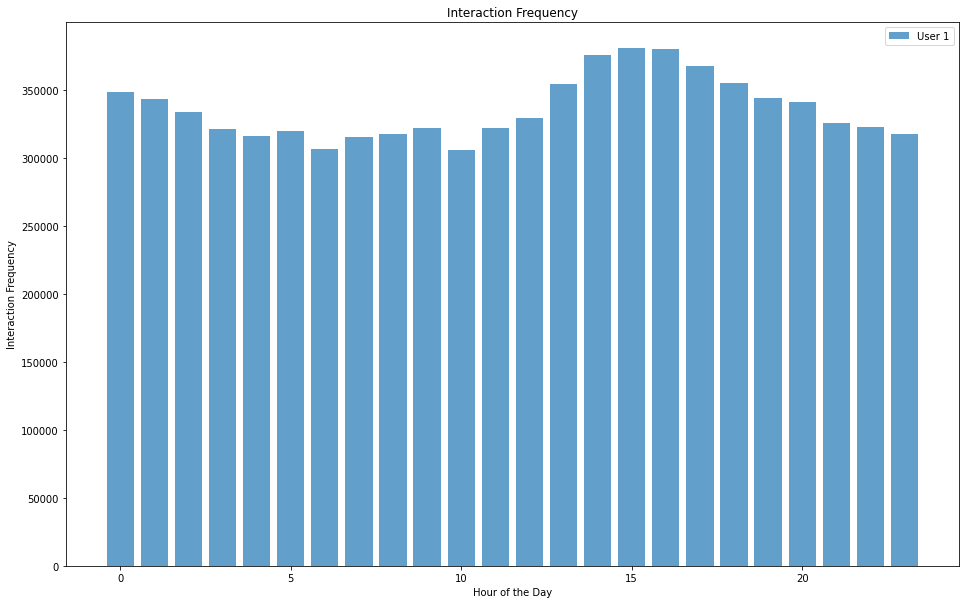

In [17]:
# Plotting the bar chart
plt.figure(figsize=(16, 10))
plt.bar(hours, sum_time_freq, label='User 1', alpha=0.7)
# plt.bar(hours, user_2_data, label='User 2', alpha=0.7)

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Interaction Frequency')
plt.title('Interaction Frequency')
plt.legend()

# Displaying the plot
plt.show()

In [56]:
user_info = pd.read_parquet('user_info_filter_asset.parquet', engine='pyarrow')
user_info.head()


,user,amount,id,asset,event_type,volume_type,priceInUSD
0,0x00000000000124d994209fbb955e0217b5c2eca1,1903.041623,0x1_0x00000000000124d994209fbb955e0217b5c2eca1,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,4.184465e+06
1,0x000000000002e33d9a86567c6dfe6d92f6777d1e,1.000000,0x1_0x000000000002e33d9a86567c6dfe6d92f6777d1e,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,2.198830e+03
2,0x00000000005ef87f8ca7014309ece7260bbcdaeb,0.090000,0x1_0x00000000005ef87f8ca7014309ece7260bbcdaeb,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,1.978947e+02
3,0x000000000062c524bd4d32f62f2e569bf171ffdd,0.000492,0x1_0x000000000062c524bd4d32f62f2e569bf171ffdd,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,1.082507e+00
4,0x00000000051cbce3fd04148cce2c0adc7c651829,3.299367,0x1_0x00000000051cbce3fd04148cce2c0adc7c651829,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,7.254746e+03


In [57]:
user_frequency.shape

(574563, 7)

In [58]:
user_frequency["amount"] = user_info["amount"].astype("float")

In [59]:
user_frequency.sort_values("priceInUSD")

,user,amount,id,asset,event_type,volume_type,priceInUSD
167305,0xaae79cab502c808d97f1a41a049d158e7ea6168a,0.000000e+00,0x1_0xaae79cab502c808d97f1a41a049d158e7ea6168a,0x0000000000000000000000000000000000000000,TRANSFER_COIN,receiving,0.000000e+00
86582,0xdcd501e1959b77b1567c2544e55df407da3c4fb4,0.000000e+00,0x1_0xdcd501e1959b77b1567c2544e55df407da3c4fb4,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,0.000000e+00
193986,0xefa755b82218dc287ed37bf6463c144ae6609076,0.000000e+00,0x1_0xefa755b82218dc287ed37bf6463c144ae6609076,0x0000000000000000000000000000000000000000,TRANSFER_COIN,receiving,0.000000e+00
193987,0xefa77c4af9973cf93f93814dde8d9f12e3fb8007,0.000000e+00,0x1_0xefa77c4af9973cf93f93814dde8d9f12e3fb8007,0x0000000000000000000000000000000000000000,TRANSFER_COIN,receiving,0.000000e+00
86577,0xdccf1eeb92425643f902af46c9af8a12f50c97e9,0.000000e+00,0x1_0xdccf1eeb92425643f902af46c9af8a12f50c97e9,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,0.000000e+00
...,...,...,...,...,...,...,...
249242,0x66b870ddf78c975af5cd8edc6de25eca81791de1,2.990064e+09,0x1_0x66b870ddf78c975af5cd8edc6de25eca81791de1,0xdac17f958d2ee523a2206206994597c13d831ec7,REPAY,sending,2.989505e+09
80573,0xcd531ae9efcce479654c4926dec5f6209531ca7b,1.384949e+06,0x1_0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,3.045268e+09
180745,0xcd531ae9efcce479654c4926dec5f6209531ca7b,1.384949e+06,0x1_0xcd531ae9efcce479654c4926dec5f6209531ca7b,0x0000000000000000000000000000000000000000,TRANSFER_COIN,receiving,3.045268e+09
1374161,0xcd531ae9efcce479654c4926dec5f6209531ca7b,9.914611e+09,0x1_0xcd531ae9efcce479654c4926dec5f6209531ca7b,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,TRANSFER_EVENT,receiving,9.912232e+09


In [62]:
grouped_df_sum_vol = user_info.groupby('user')['priceInUSD'].sum().reset_index()

# Display the result
grouped_df_sum_vol.head()

,user,priceInUSD
0,0x00000000000030e5959659622cb7eb50aa20ee52,8.811038e+05
1,0x00000000000124d994209fbb955e0217b5c2eca1,1.119318e+07
2,0x000000000002e33d9a86567c6dfe6d92f6777d1e,4.397660e+03
3,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,9.112055e+05
4,0x00000000005ef87f8ca7014309ece7260bbcdaeb,3.957894e+02


In [65]:
grouped_df_sum_vol["log_price"] = grouped_df_sum_vol["priceInUSD"].map(lambda i: np.log(i) if i > 0 else 0)
grouped_df_sum_vol.head()

,user,priceInUSD,log_price
0,0x00000000000030e5959659622cb7eb50aa20ee52,8.811038e+05,13.688931
1,0x00000000000124d994209fbb955e0217b5c2eca1,1.119318e+07,16.230816
2,0x000000000002e33d9a86567c6dfe6d92f6777d1e,4.397660e+03,8.388828
3,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,9.112055e+05,13.722524
4,0x00000000005ef87f8ca7014309ece7260bbcdaeb,3.957894e+02,5.980882


In [67]:
percentiles = grouped_df_sum_vol['log_price'].quantile([0.25, 0.75])

# Print the results
print("25th percentile:", percentiles[0.25])
print("75th percentile:", percentiles[0.75])

25th percentile: 5.036420642766363
75th percentile: 9.566570906774043


In [70]:
grouped_df_sum_vol[grouped_df_sum_vol["log_price"] <= percentiles[0.25]]

,user,priceInUSD,log_price
5,0x000000000062c524bd4d32f62f2e569bf171ffdd,2.165013,0.772426
18,0x000000920f17a49d80550f044c9bba7923a9fa36,18.909938,2.939688
20,0x000000faceff53eaaa8bafb76eab82fad96eb8e0,59.115475,4.079493
22,0x000001f568875f378bf6d170b790967fe429c81a,45.759530,3.823400
23,0x000002100e7c0d8bc84ca80afeb8284892e4ee61,0.000000,0.000000
...,...,...,...
139755,0xfff335c8a32cff2a7848ffb0847ff9cfe446bcad,44.878032,3.803948
139757,0xfff473d10c5ca6abe9087b370ff6965b0f12d5d5,95.186401,4.555837
139761,0xfff663181df8845776bacfc9dae23111232fbbd4,132.195038,4.884278
139766,0xfffaf54a65eb198d704ea8c0b48eee29679120f6,146.854620,4.989443


In [74]:
print(low_volume_user.size,medium_volume_user.size, high_volume_user.size)

34949 69888 34946


In [73]:
low_volume_user = grouped_df_sum_vol[grouped_df_sum_vol["log_price"] <= percentiles[0.25]]["user"].values
medium_volume_user = grouped_df_sum_vol[(percentiles[0.25] < grouped_df_sum_vol["log_price"]) & (grouped_df_sum_vol["log_price"]< percentiles[0.75])]["user"].values
high_volume_user = grouped_df_sum_vol[grouped_df_sum_vol["log_price"] >= percentiles[0.75]]["user"].values

In [80]:
grouped_df_sum_vol[(percentiles[0.25] < grouped_df_sum_vol["log_price"]) & (grouped_df_sum_vol["log_price"]< percentiles[0.75])]["priceInUSD"].max()

14278.79587895312

C:\Users\Admin\AppData\Local\Temp\ipykernel_7164\1619442460.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


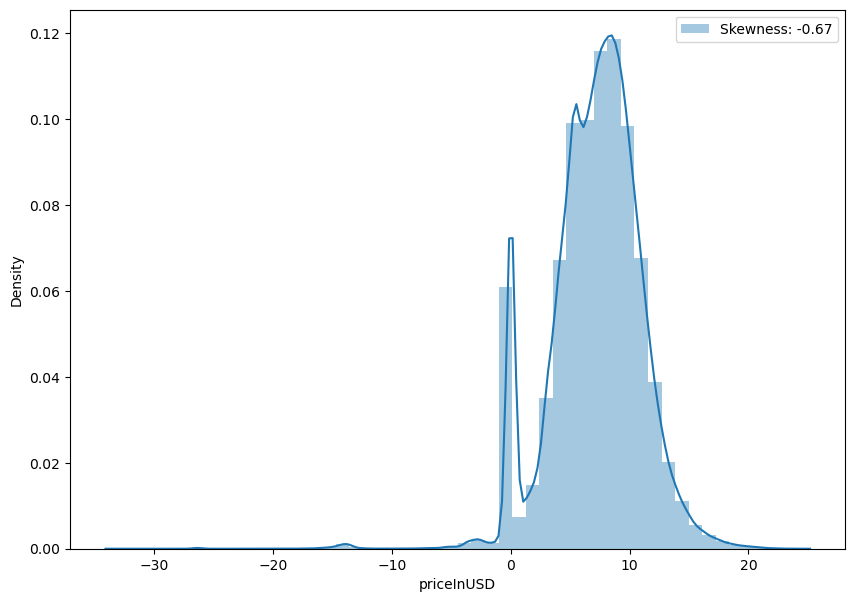

In [63]:
Log_Fare = grouped_df_sum_vol["priceInUSD"].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(10, 7))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

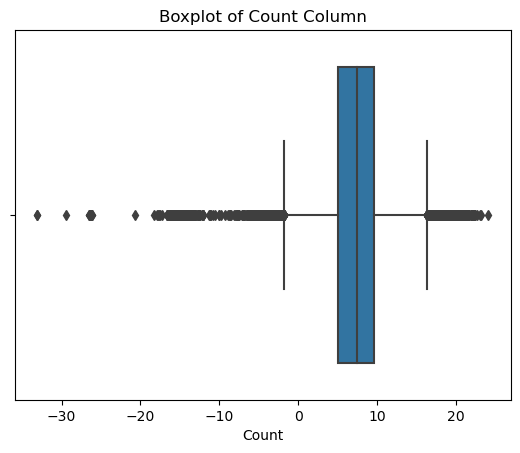

In [64]:
sns.boxplot(x=grouped_df_sum_vol["priceInUSD"].map(lambda i: np.log(i) if i > 0 else 0))

plt.title('Boxplot of Count Column')
plt.xlabel('Count')
plt.show()

In [112]:
print("Mean amount: ", user_info["amount"].mean())
print("Median amount: ", user_info["amount"].median())

Mean amount:  8.034289605681937e+73
Median amount:  1282.0


In [109]:
print("Mean amount (receiving): ", user_info[user_info["volume_type"] == "receiving"]["amount"].mean())
print("Mean amount (sending): ", user_info[user_info["volume_type"] == "sending"]["amount"].mean())
print("Median amount(receiving): ", user_info[user_info["volume_type"] == "receiving"]["amount"].median())
print("Median amount(sending): ", user_info[user_info["volume_type"] == "sending"]["amount"].median())

Mean amount (receiving):  7.09735731396987e+73
Mean amount (sending):  9.085235864155238e+73
Median amount(receiving):  1058.0
Median amount(sending):  1553.7070076887717


<ipython-input-25-5f482c8d7796>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


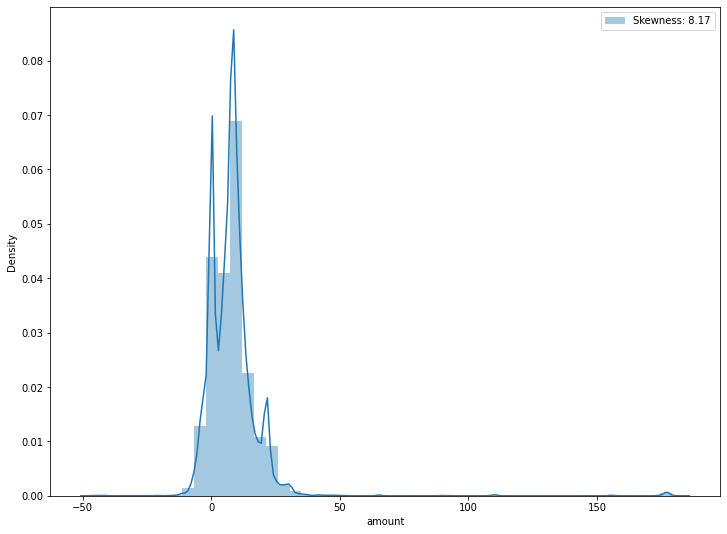

In [25]:
Log_Fare = user_info[user_info["volume_type"] == "receiving"]["amount"].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(12, 9))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
<ipython-input-23-d6790526e6a5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )


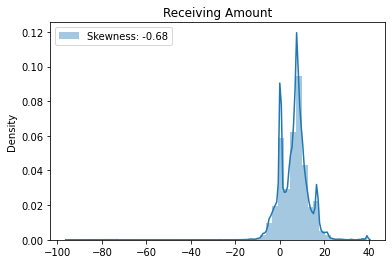

In [23]:
Boxcox_Fare = user_info[user_info["volume_type"] == "receiving"]["amount"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Fare= stats.boxcox(Boxcox_Fare)
Boxcox_Fare= pd.Series(Boxcox_Fare[0])
t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )
t.set_title('Receiving Amount')
t.legend()

<ipython-input-26-b52a7a5e2536>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


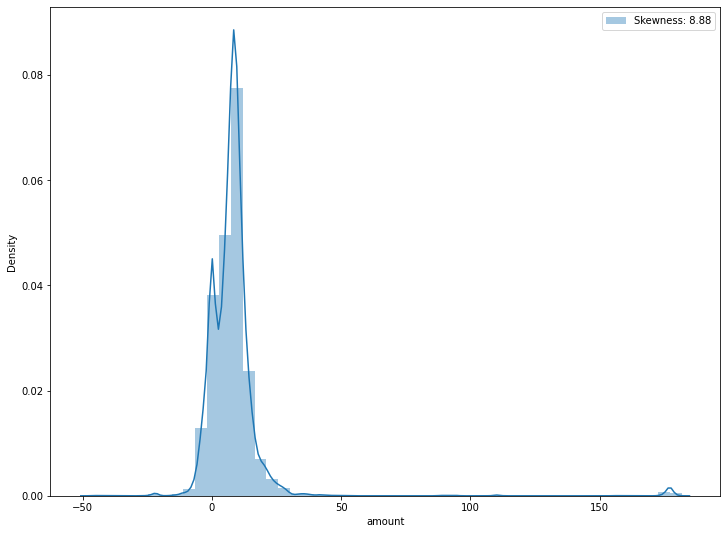

In [26]:
Log_Fare = user_info[user_info["volume_type"] == "sending"]["amount"].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(12, 9))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
<ipython-input-27-3f4ac3fed1c4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )


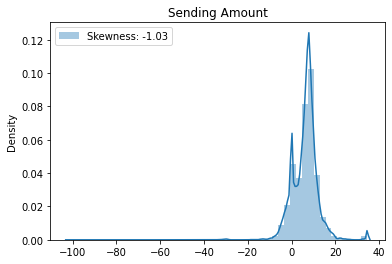

In [27]:
Boxcox_Fare = user_info[user_info["volume_type"] == "sending"]["amount"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Fare= stats.boxcox(Boxcox_Fare)
Boxcox_Fare= pd.Series(Boxcox_Fare[0])
t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )
t.set_title('Sending Amount')
t.legend()

In [28]:
# Log_Fare = user_info[user_info["volume_type"] == "receiving"]["amount"].map(lambda i: np.log(i) if i > 0 else 0)
# t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
# t.legend()

In [29]:
user_info["event_type"].unique()

array(['TRANSFER_COIN', 'LIQUIDATE', 'REPAY', 'WITHDRAW', 'BORROW',
       'DEPOSIT', 'TRANSFER_EVENT'], dtype=object)

In [30]:
user_info_sum = user_info.groupby('event_type')['amount'].sum().reset_index()
user_info_sum

,event_type,amount
0,BORROW,1.253155e+10
1,DEPOSIT,8.133605e+09
2,LIQUIDATE,1.439941e+08
3,REPAY,1.218409e+10
4,TRANSFER_COIN,2.236494e+07
5,TRANSFER_EVENT,1.060007e+81
6,WITHDRAW,1.079048e+15


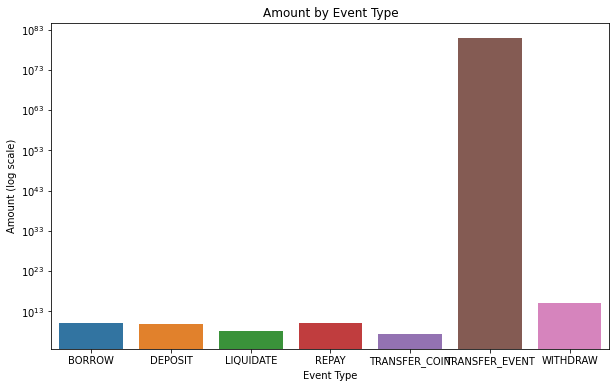

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='event_type', y='amount', data=user_info_sum)
plt.yscale('log')  # Use log scale for better visualization if the values have a wide range

plt.title('Amount by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Amount (log scale)')
plt.show()

In [27]:
user_interact = pd.read_parquet('user_interact.parquet', engine='pyarrow')
user_interact.head(20)

,user,other_user,count
index,,,
1,0x00000000000030e5959659622cb7eb50aa20ee52,0x01949723055a451229c7ba3a817937c966748f76,2
2,0x00000000000030e5959659622cb7eb50aa20ee52,0x058d79a4c6eb5b11d0248993ffa1faa168ddd3c0,4
3,0x00000000000030e5959659622cb7eb50aa20ee52,0x06b1655b9d560de112759b4f0bf57d6f005e72fe,2
4,0x00000000000030e5959659622cb7eb50aa20ee52,0x06bfac47528d0d6a2de3b1ae5d8214ad45b4b945,4
5,0x00000000000030e5959659622cb7eb50aa20ee52,0x0928592f80d63d474257a7b797120e301ba2d987,10
6,0x00000000000030e5959659622cb7eb50aa20ee52,0x117439f6fdde9a09d28eb78759cd5c852a8653f0,16
7,0x00000000000030e5959659622cb7eb50aa20ee52,0x11950d141ecb863f01007add7d1a342041227b58,1
8,0x00000000000030e5959659622cb7eb50aa20ee52,0x14424eeecbff345b38187d0b8b749e56faa68539,1
9,0x00000000000030e5959659622cb7eb50aa20ee52,0x15ab0333985fd1e289adf4fbbe19261454776642,3


In [33]:
grouped_df_count = user_interact.groupby('user')['count'].count().reset_index()

# Display the result
grouped_df_count.head()

,user,count
0,0x00000000000030e5959659622cb7eb50aa20ee52,69
1,0x00000000000124d994209fbb955e0217b5c2eca1,316
2,0x000000000002e33d9a86567c6dfe6d92f6777d1e,5
3,0x000000000004d7463d0f9c77383600bc82d612f5,2
4,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,1


In [34]:
top_20_rows_count = grouped_df_count.nlargest(20, 'count')
print("Top 20 user interacting with the most users")
print(top_20_rows_count)

Top 20 user interacting with the most users
                                              user   count
94512   0x974caa59e49682cda0ad2bbe82983419a2ecc400  169133
45574   0x48c04ed5691981c42154c6167398f95e8f38a7ff   69896
50194   0x500a746c9a44f68fe6aa86a92e7b3af4f322ae66   49102
14297   0x1689a089aa12d6cbbd88bc2755e4c192f8702000   47968
17984   0x1c727a55ea3c11b0ab7d3a361fe0f3c47ce6de5d   41882
55684   0x58edf78281334335effa23101bbe3371b6a36a51   35699
71650   0x72bcfa6932feacd91cb2ea44b0731ed8ae04d0d3   35285
95538   0x98db3a41bf8bf4ded2c92a84ec0705689ddeef8b   34057
129591  0xcfc0f98f30742b6d880f90155d4ebb885e55ab33   31924
93479   0x95b564f3b3bae3f206aa418667ba000afafacc8a   31867
55546   0x58b704065b7aff3ed351052f8560019e05925023   30478
119782  0xbfcd86e36d947a9103a7d4a95d178a432723d6ad   25069
30436   0x30741289523c2e4d2a62c7d6722686d14e723851   24100
115023  0xb8001c3ec9aa1985f6c747e25c28324e4a361ec1   23744
159209  0xffec0067f5a79cff07527f63d83dd5462ccf8ba4   22943
148389  0xee

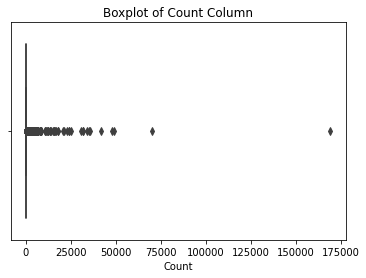

In [35]:
sns.boxplot(x=grouped_df_count['count'])

plt.title('Boxplot of Count Column')
plt.xlabel('Count')
plt.show()

<ipython-input-37-d4419501bdca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


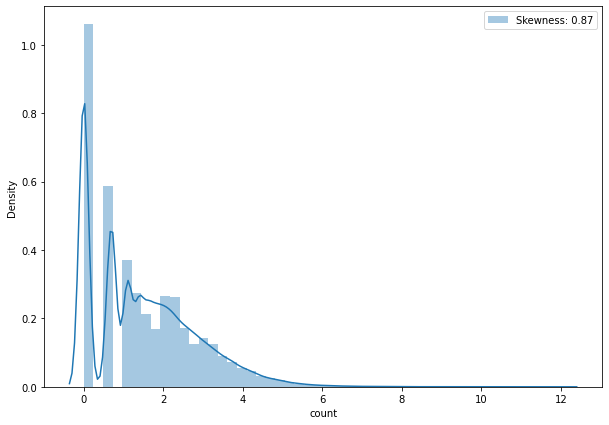

In [37]:
Log_Fare = grouped_df_count['count'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(10, 7))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

<ipython-input-38-9842deb3a1af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )


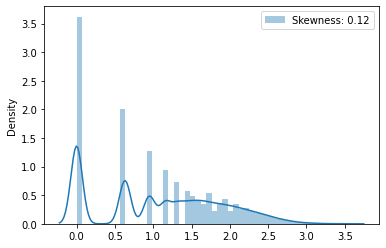

In [38]:
Boxcox_Fare = grouped_df_count['count'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Fare= stats.boxcox(Boxcox_Fare)
Boxcox_Fare= pd.Series(Boxcox_Fare[0])
t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )
t.legend()

In [28]:
grouped_df_sum = user_interact.groupby('user')['count'].sum().reset_index()

# Display the result
grouped_df_sum.head()

,user,count
0,0x00000000000030e5959659622cb7eb50aa20ee52,575
1,0x00000000000124d994209fbb955e0217b5c2eca1,7883
2,0x000000000002e33d9a86567c6dfe6d92f6777d1e,4
3,0x00000000000cd56832ce5dfbcbff02e7ec639bc9,1
4,0x00000000005ef87f8ca7014309ece7260bbcdaeb,6


In [29]:
top_20_rows_sum = grouped_df_sum.nlargest(20, 'count')
print("Top 20 user interacting the most of times")
print(top_20_rows_sum)

Top 20 user interacting the most of times
                                              user   count
76407   0x974caa59e49682cda0ad2bbe82983419a2ecc400  940720
36798   0x48c04ed5691981c42154c6167398f95e8f38a7ff  204649
104871  0xcfc0f98f30742b6d880f90155d4ebb885e55ab33  182895
16492   0x2008b6c3d07b061a84f790c035c2f6dc11a0be70  149917
81508   0xa152f8bb749c55e9943a3a0a3111d18ee2b3f94e  141980
44913   0x58b704065b7aff3ed351052f8560019e05925023  136019
14590   0x1c727a55ea3c11b0ab7d3a361fe0f3c47ce6de5d  119050
60871   0x787b8840100d9baadd7463f4a73b5ba73b00c6ca  110749
45023   0x58edf78281334335effa23101bbe3371b6a36a51   95082
5842    0x0b5c4a7fcda49e0a8661419bb55b86161a86db2a   82117
11561   0x1689a089aa12d6cbbd88bc2755e4c192f8702000   79295
75577   0x95b564f3b3bae3f206aa418667ba000afafacc8a   77047
120575  0xef8801eaf234ff82801821ffe2d78d60a0237f97   70375
23199   0x2db1d8cdf1abe8c70b531a790cdf2ff38aecf652   69979
77230   0x98db3a41bf8bf4ded2c92a84ec0705689ddeef8b   69375
102830  0xcbb0

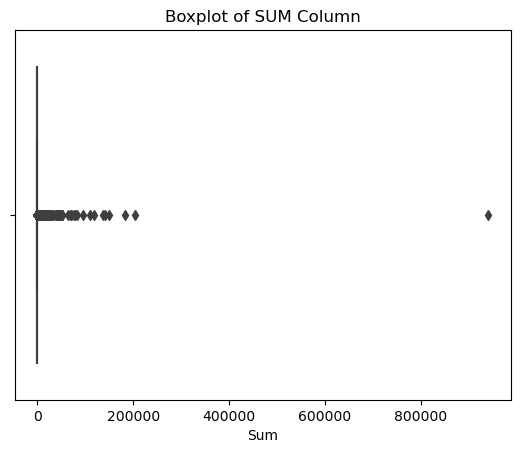

In [30]:
sns.boxplot(x=grouped_df_sum['count'])

plt.title('Boxplot of SUM Column')
plt.xlabel('Sum')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7164\3557771148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )


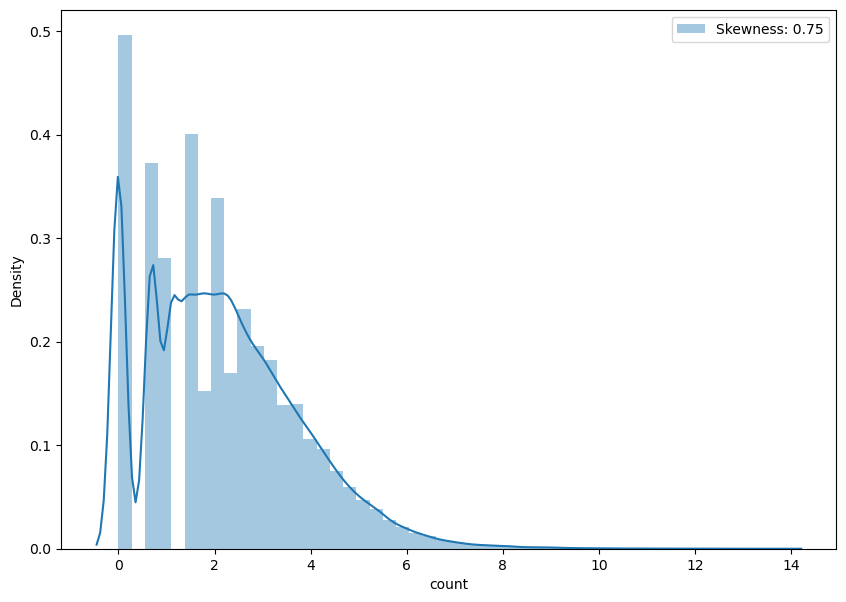

In [31]:
Log_Fare = grouped_df_sum['count'].map(lambda i: np.log(i) if i > 0 else 0)
plt.figure(figsize=(10, 7))
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7164\3244803117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )


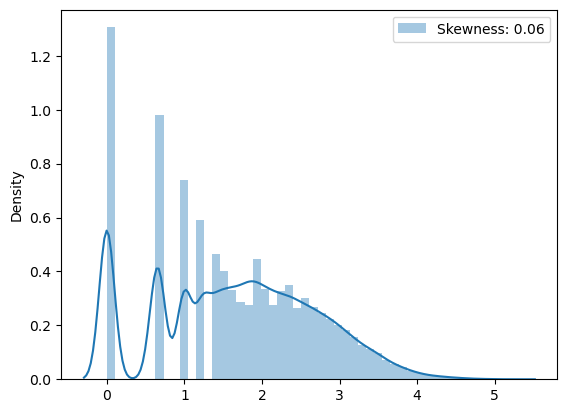

In [32]:
Boxcox_Fare = grouped_df_sum['count'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Fare= stats.boxcox(Boxcox_Fare)
Boxcox_Fare= pd.Series(Boxcox_Fare[0])
t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )
t.legend()

In [33]:
grouped_df_sum["user"].unique().shape

(128820,)

In [34]:
sorted_values_sum = np.sort(grouped_df_sum["count"])
total_sum = np.sum(grouped_df_sum["count"])

In [35]:
total_sum

10757476

In [54]:
low_interact_with_user = grouped_df_sum.sort_values("count")["user"][:86107].values
medium_interact_with_user = grouped_df_sum.sort_values("count")["user"][86107:86107+36553].values
high_interact_with_user = grouped_df_sum.sort_values("count")["user"][86107+36553:].values

In [38]:
low_interactive_user = []
current_sum = 0
target_sum = total_sum*0.04
for element in sorted_values_sum:
    if current_sum + element <= target_sum:
        low_interactive_user.append(element)
        current_sum += element
    else:
        break

low_interactive_user = np.array(low_interactive_user)
print(low_interactive_user[0], low_interactive_user[-1])
low_interactive_user.shape

1 15


(86107,)

In [40]:
medium_interactive_user = []
current_sum = 0
target_sum = total_sum*0.16
for element in sorted_values_sum[86107:]:
    if current_sum + element < target_sum:
        medium_interactive_user.append(element)
        current_sum += element
    else:
        break

medium_interactive_user = np.array(medium_interactive_user)
print(medium_interactive_user[0], medium_interactive_user[-1])
medium_interactive_user.shape

15 162


(36553,)

In [42]:
high_interactive_user = []
current_sum = 0
target_sum = total_sum*0.80
for element in sorted_values_sum[86107+36553:]:
    if current_sum + element <= target_sum:
        high_interactive_user.append(element)
        current_sum += element
    else:
        break

high_interactive_user = np.array(high_interactive_user)
print(high_interactive_user[0], high_interactive_user[-1])
high_interactive_user.shape


162 204649


(6159,)

In [78]:
sorted_values_count = np.sort(grouped_df_count["count"])
total_count = np.sum(grouped_df_count["count"])

In [79]:
total_count

3522871

In [80]:
low_interactive_user_to_otheruser = []
current_sum = 0
target_sum = total_sum*0.04
for element in sorted_values_count:
    if current_sum + element <= target_sum:
        low_interactive_user_to_otheruser.append(element)
        current_sum += element
    else:
        break

low_interactive_user_to_otheruser = np.array(low_interactive_user_to_otheruser)
low_interactive_user_to_otheruser.shape

(126419,)

In [81]:
medium_interactive_user_to_otheruser = []
current_sum = 0
target_sum = total_sum*0.16
for element in sorted_values_count[126419:]:
    if current_sum + element <= target_sum:
        medium_interactive_user_to_otheruser.append(element)
        current_sum += element
    else:
        break

medium_interactive_user_to_otheruser = np.array(medium_interactive_user_to_otheruser)
medium_interactive_user_to_otheruser.shape

(32763,)

In [82]:
high_interactive_user_to_otheruser = []
current_sum = 0
target_sum = total_sum*0.80
for element in sorted_values_count[126419+32763:]:
    if current_sum + element <= target_sum:
        high_interactive_user_to_otheruser.append(element)
        current_sum += element
    else:
        break

high_interactive_user_to_otheruser = np.array(high_interactive_user_to_otheruser)
high_interactive_user_to_otheruser.shape

(77,)

In [83]:
low_interact_with_user
medium_interact_with_user
high_interact_with_user
low_interact_with_contract
medium_interact_with_contract
high_interact_with_contract
low_volume_user
medium_volume_user
high_volume_user

array([  3170,   3191,   3217,   3368,   3557,   3588,   3659,   3686,
         3717,   3750,   3837,   4021,   4053,   4082,   4091,   4200,
         4251,   4556,   4657,   4810,   4920,   5104,   5143,   5169,
         5610,   5624,   5655,   5782,   5823,   5902,   6048,   6226,
         6329,   6479,   6527,   6700,   7649,   7863,   7965,   7984,
         8239,   8239,   8343,   8391,  10708,  10728,  11277,  11714,
        12174,  12265,  13173,  13643,  13754,  15222,  15385,  15767,
        15890,  16949,  17645,  17645,  20378,  20989,  22943,  23744,
        24100,  25069,  30478,  31867,  31924,  34057,  35285,  35699,
        41882,  47968,  49102,  69896, 169133], dtype=int64)

In [82]:
import json

file_path = 'balance.json'

# Read the JSON file into a dictionary
with open(file_path, 'r') as file:
    balance_data = json.load(file)

In [85]:
high_balance_user = np.array(balance_data['high'])
medium_balance_user = np.array(balance_data['medium'])

In [182]:
high_volume_bot = np.intersect1d(np.intersect1d(medium_balance_user, high_volume_user), high_interact_with_contract)
len(high_volume_bot)

1342

In [197]:
low_volume_bot = np.intersect1d(low_volume_user, high_interact_with_contract)
len(low_volume_bot)

45

In [198]:
active_user = np.setdiff1d(medium_interact_with_contract, high_balance_user)
len(active_user)

22616

In [199]:
p2p_user = np.intersect1d(high_interact_with_user, medium_balance_user)
len(p2p_user)

1042

In [200]:
inactive_user = np.setdiff1d(np.intersect1d(low_interact_with_user, low_interact_with_contract), active_user)
len(inactive_user)

17581

In [201]:
# Find the common elements in high_balance_user and high_volume_user
common_elements = np.intersect1d(high_balance_user, high_volume_user)

# Find the elements that are common with either high_interact_with_contract or high_interact_with_user
big_team = np.intersect1d(common_elements, np.union1d(high_interact_with_contract, high_interact_with_user))

len(big_team)

270

In [202]:
whale = np.setdiff1d(high_balance_user, big_team)

len(whale)

108

In [203]:
label = {
"whale": whale.tolist(),
"big_team": big_team.tolist(),
"high_volume_bot": high_volume_bot.tolist(),
"low_volume_bot": low_volume_bot.tolist(),
"p2p_user": p2p_user.tolist(),
"inactive_user": inactive_user.tolist(),
"active_user": active_user.tolist()
}

In [204]:
# Specify the file path
file_path = 'label.json'

# Export the 'label' dictionary to a JSON file
with open(file_path, 'w') as json_file:
    json.dump(label, json_file, indent=2)

print(f'Dictionary "label" exported to {file_path}')

Dictionary "label" exported to label.json


In [205]:
list_of_tables = [contract_interact, user_info, user_interact, user_frequency]

In [206]:
whale_contract_interact = contract_interact[contract_interact['user'].isin(whale)]
big_team_whale_contract_interact = contract_interact[contract_interact['user'].isin(big_team)]
high_volume_bot_contract_interact = contract_interact[contract_interact['user'].isin(high_volume_bot)]
low_volume_bot_contract_interact = contract_interact[contract_interact['user'].isin(low_volume_bot)]
p2p_user_contract_interact = contract_interact[contract_interact['user'].isin(p2p_user)]
inactive_user_contract_interact = contract_interact[contract_interact['user'].isin(inactive_user)]
active_user_contract_interact = contract_interact[contract_interact['user'].isin(active_user)]

whale_contract_interact.head()

,user,contract_address,count
index,,,
876,0x7e07d5e8205296f758611b2455b5d4f0140cfd4c,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,9
1378,0xbce3e29641b2083716e023f0bb56635d3062c8c3,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,18
2547,0x96e1199931a9e201a4d209262c8c379e2c0e4852,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,8
2677,0xbda6ba3ad624582495c55451a1840e563fc16389,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,1
3354,0x0ca99c61fc169d131ba890433792483ebe0ecd1a,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,2


In [207]:
type_contract_interact = [whale_contract_interact, big_team_whale_contract_interact, 
                        high_volume_bot_contract_interact, low_volume_bot_contract_interact, 
                        p2p_user_contract_interact, inactive_user_contract_interact, active_user_contract_interact]

In [208]:
# Log_Fare = grouped_df_sum_con['count'].map(lambda i: np.log(i) if i > 0 else 0)
# plt.figure(figsize=(10, 7))
# t=sns.histplot(grouped_df_sum_con['count'])
# t.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

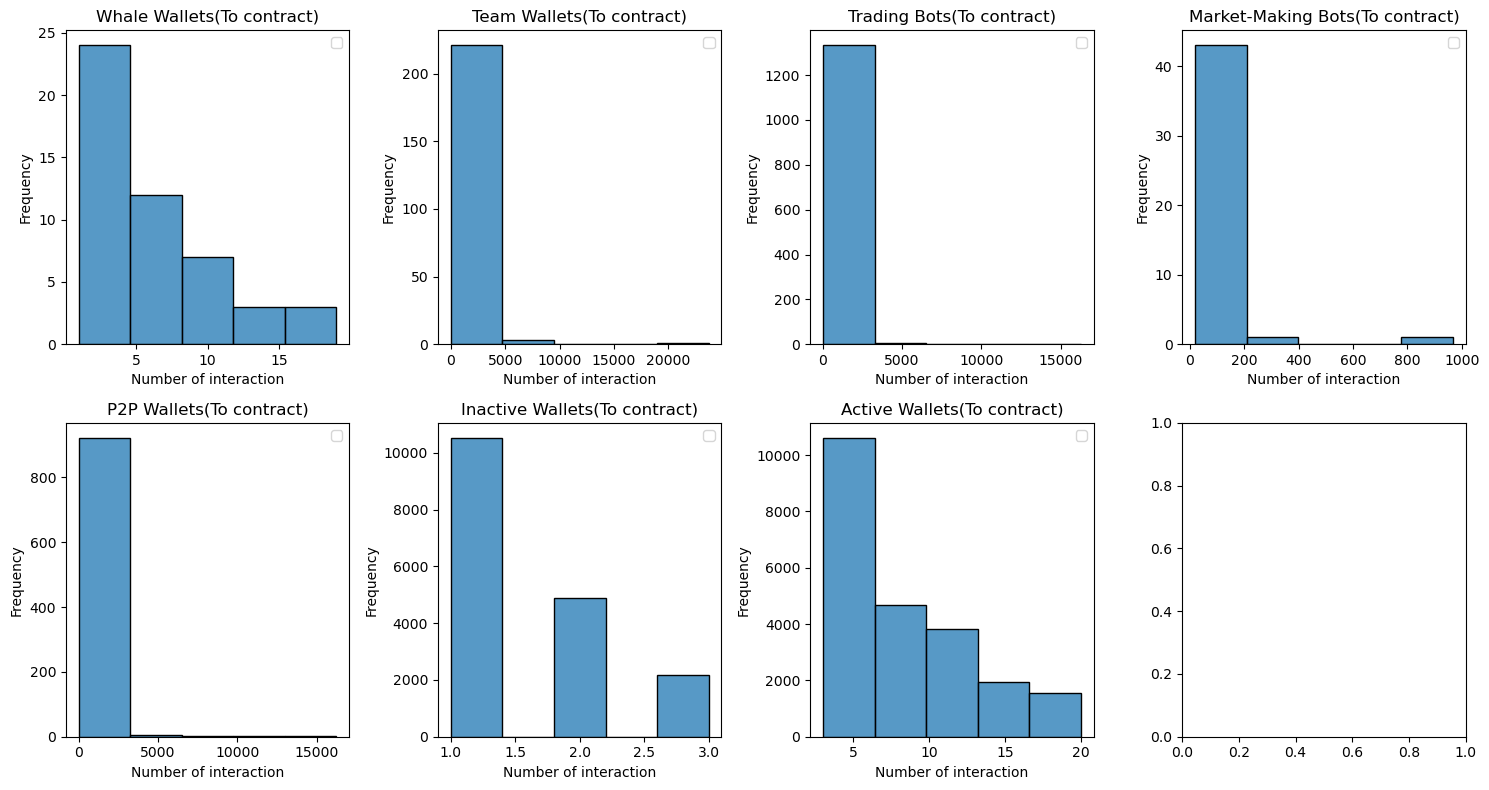

In [209]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Trading Bots', 'Market-Making Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes[0:-1]):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)
    subset_data = type_contract_interact[i].groupby('user')['count'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['count'], bins =5, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i] + "(To contract)")
    ax.set_xlabel("Number of interaction")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [210]:
def mean_user_interaction_contract(label):
    x = label.groupby('user')['count'].sum().reset_index()["count"].mean()
    return x

label_names = ['Whale Wallets', 'Team Wallets', 'Trading Bots', 'Market-Making Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

for idx, label in enumerate(type_contract_interact):
    print(label_names[idx], "- Average number of interaction (to contracts): ", mean_user_interaction_contract(label))
    

Whale Wallets - Average number of interaction (to contracts):  5.795918367346939
Team Wallets - Average number of interaction (to contracts):  372.1377777777778
Trading Bots - Average number of interaction (to contracts):  178.28837555886736
Market-Making Bots - Average number of interaction (to contracts):  62.577777777777776
P2P Wallets - Average number of interaction (to contracts):  209.6047261009667
Inactive Wallets - Average number of interaction (to contracts):  1.5243160229793526
Active Wallets - Average number of interaction (to contracts):  8.312256809338521


In [211]:
whale_user_info = user_info[user_info['user'].isin(whale)]
big_team_user_info = user_info[user_info['user'].isin(big_team)]
high_volume_bot_user_info = user_info[user_info['user'].isin(high_volume_bot)]
low_volume_bot_user_info = user_info[user_info['user'].isin(low_volume_bot)]
p2p_user_user_info = user_info[user_info['user'].isin(p2p_user)]
inactive_user_user_info = user_info[user_info['user'].isin(inactive_user)]
active_user_user_info = user_info[user_info['user'].isin(active_user)]

whale_user_info.head()

,user,amount,id,asset,event_type,volume_type,priceInUSD
2041,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,745.00,0x1_0x04ffb838944173629b5ecee49f1043a29fbf1d8c,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,1.638128e+06
2111,0x05271853224d839a9bc6a342f27821e7fb32b001,9.20,0x1_0x05271853224d839a9bc6a342f27821e7fb32b001,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,2.022924e+04
3919,0x09b176b1a97acbd5390dc6e35b91676e139676f1,0.00,0x1_0x09b176b1a97acbd5390dc6e35b91676e139676f1,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,0.000000e+00
4437,0x0afc1a3f10a803ac13adc12adf00774aefc3fd6d,4128.87,0x1_0x0afc1a3f10a803ac13adc12adf00774aefc3fd6d,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,9.078683e+06
4855,0x0c02d56f802ba2f79bfccd91b921a18f3df49ed0,0.00,0x1_0x0c02d56f802ba2f79bfccd91b921a18f3df49ed0,0x0000000000000000000000000000000000000000,TRANSFER_COIN,sending,0.000000e+00


In [212]:
type_user_info = [whale_user_info, big_team_user_info, 
                        high_volume_bot_user_info, low_volume_bot_user_info, 
                        p2p_user_user_info, inactive_user_user_info, active_user_user_info]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

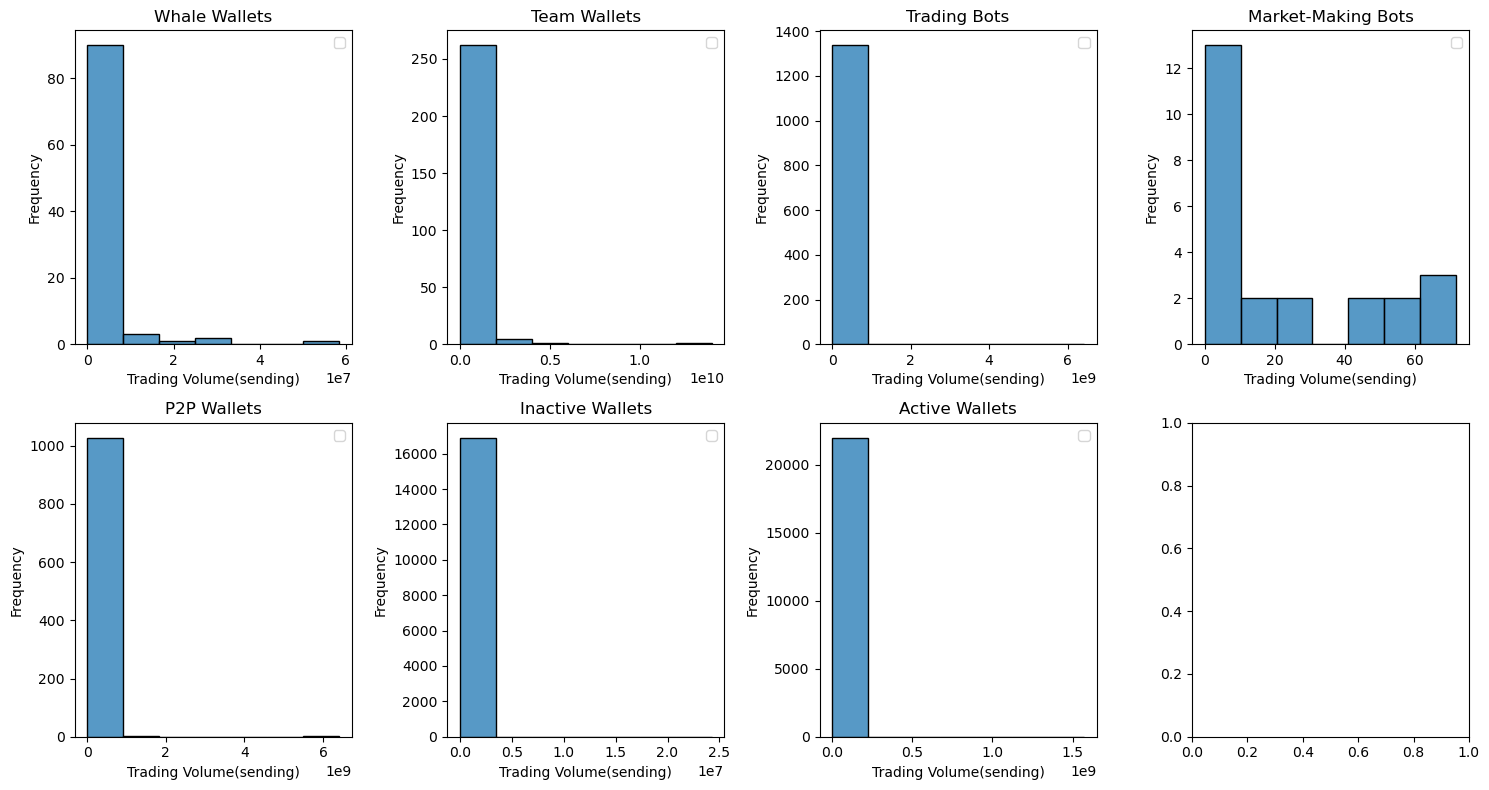

In [225]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Trading Bots', 'Market-Making Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes[0:-1]):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)
    subset_data = type_user_info[i][type_user_info[i]["volume_type"]=="sending"].groupby('user')['priceInUSD'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['priceInUSD'], bins =7, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i])
    ax.set_xlabel("Trading Volume(sending)")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

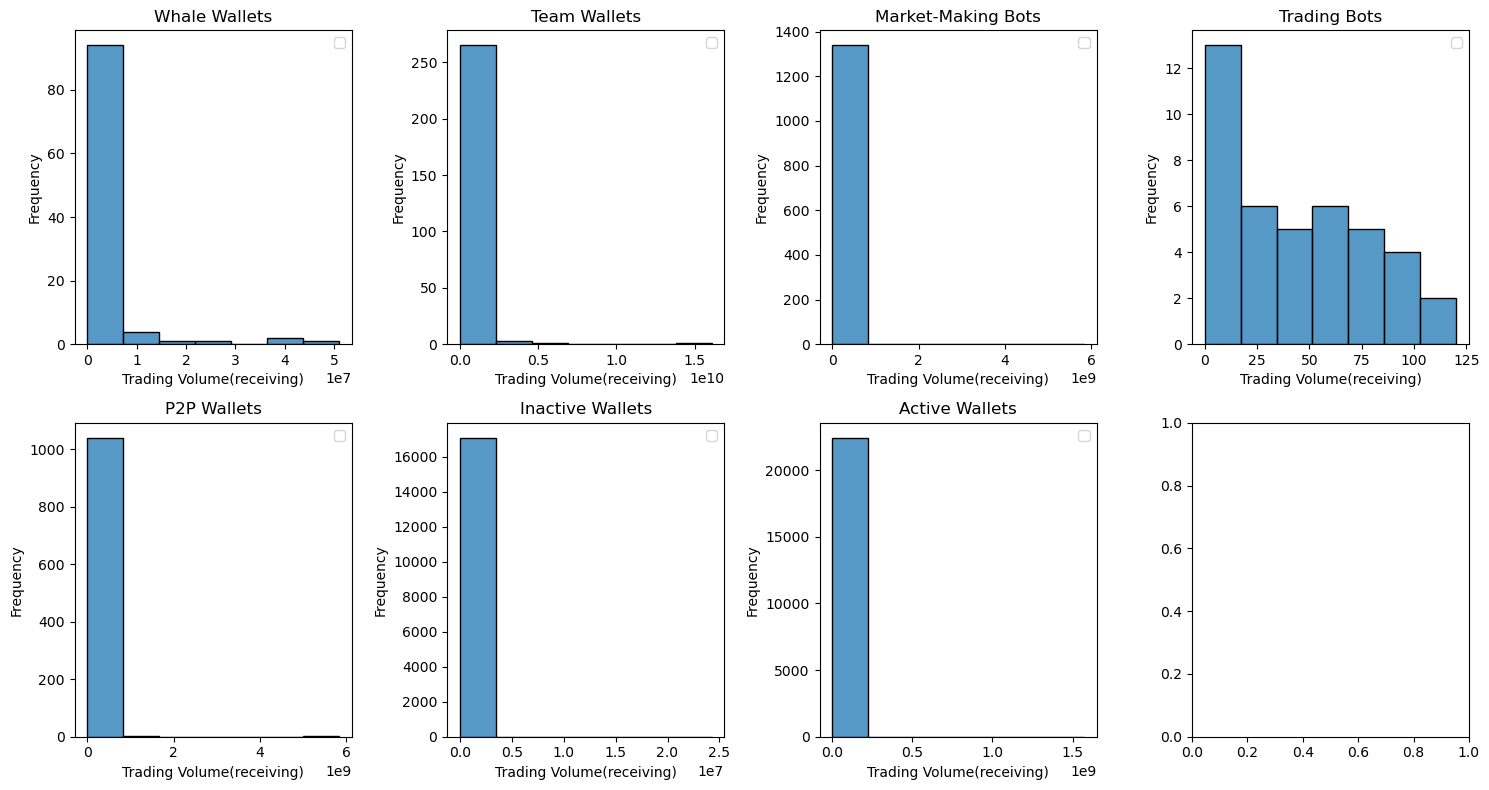

In [224]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Market-Making Bots', 'Trading Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes[0:-1]):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)
    subset_data = type_user_info[i][type_user_info[i]["volume_type"]=="receiving"].groupby('user')['priceInUSD'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['priceInUSD'], bins =7, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i])
    ax.set_xlabel("Trading Volume(receiving)")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [215]:
def mean_trading_vol(label):
    x = label.groupby('user')['priceInUSD'].sum().reset_index()["priceInUSD"].mean()
    return x

label_names = ['Whale Wallets', 'Team Wallets', 'Market-Making Bots', 'Trading Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

for idx, label in enumerate(type_user_info):
    print(label_names[idx], "- Average Transaction: ", mean_trading_vol(label), "USD")
    

Whale Wallets - Average Transaction:  5049593.23312752 USD
Team Wallets - Average Transaction:  513147109.7951052 USD
Market-Making Bots - Average Transaction:  27385163.47003418 USD
Trading Bots - Average Transaction:  50.281513163835776 USD
P2P Wallets - Average Transaction:  40345064.99672794 USD
Inactive Wallets - Average Transaction:  12719.070781678925 USD
Active Wallets - Average Transaction:  722448.7477405302 USD


In [216]:
whale_user_frequency = user_frequency[user_frequency['user'].isin(whale)]
big_team_user_frequency = user_frequency[user_frequency['user'].isin(big_team)]
high_volume_bot_user_frequency = user_frequency[user_frequency['user'].isin(high_volume_bot)]
low_volume_bot_user_frequency = user_frequency[user_frequency['user'].isin(low_volume_bot)]
p2p_user_user_frequency = user_frequency[user_frequency['user'].isin(p2p_user)]
inactive_user_user_frequency = user_frequency[user_frequency['user'].isin(inactive_user)]
active_user_user_frequency = user_frequency[user_frequency['user'].isin(active_user)]

whale_user_frequency.head()

,user,block_timestamp_list,time_frequency
3430,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,"[1695135203, 1695182843, 1700270543, 170036693...","[0, 2, 2, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, ..."
3548,0x05271853224d839a9bc6a342f27821e7fb32b001,"[1698494111, 1698523883, 1699138931, 169914291...","[1, 1, 0, 3, 1, 1, 1, 0, 0, 0, 0, 3, 1, 18, 24..."
3870,0x05936f6a5ea9abfbfcc690f1a6140d97e80640f9,"[1698100643, 1698334715, 1698335147, 169895925...","[0, 6, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, ..."
5159,0x075e72a5edf65f0a5f44699c7654c1a76941ddc8,"[1699754219, 1695434159, 1695434387, 169544469...","[0, 4, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
6743,0x09b176b1a97acbd5390dc6e35b91676e139676f1,"[1696208411, 1696386095, 1693285943, 169328602...","[2, 4, 1, 0, 4, 5, 0, 3, 4, 3, 0, 0, 0, 1, 2, ..."


In [217]:
type_user_frequency = [whale_user_frequency, big_team_user_frequency, 
                        high_volume_bot_user_frequency, low_volume_bot_user_frequency, 
                        p2p_user_user_frequency, inactive_user_user_frequency, active_user_user_frequency]

In [218]:
hours = [i for i in range(24)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

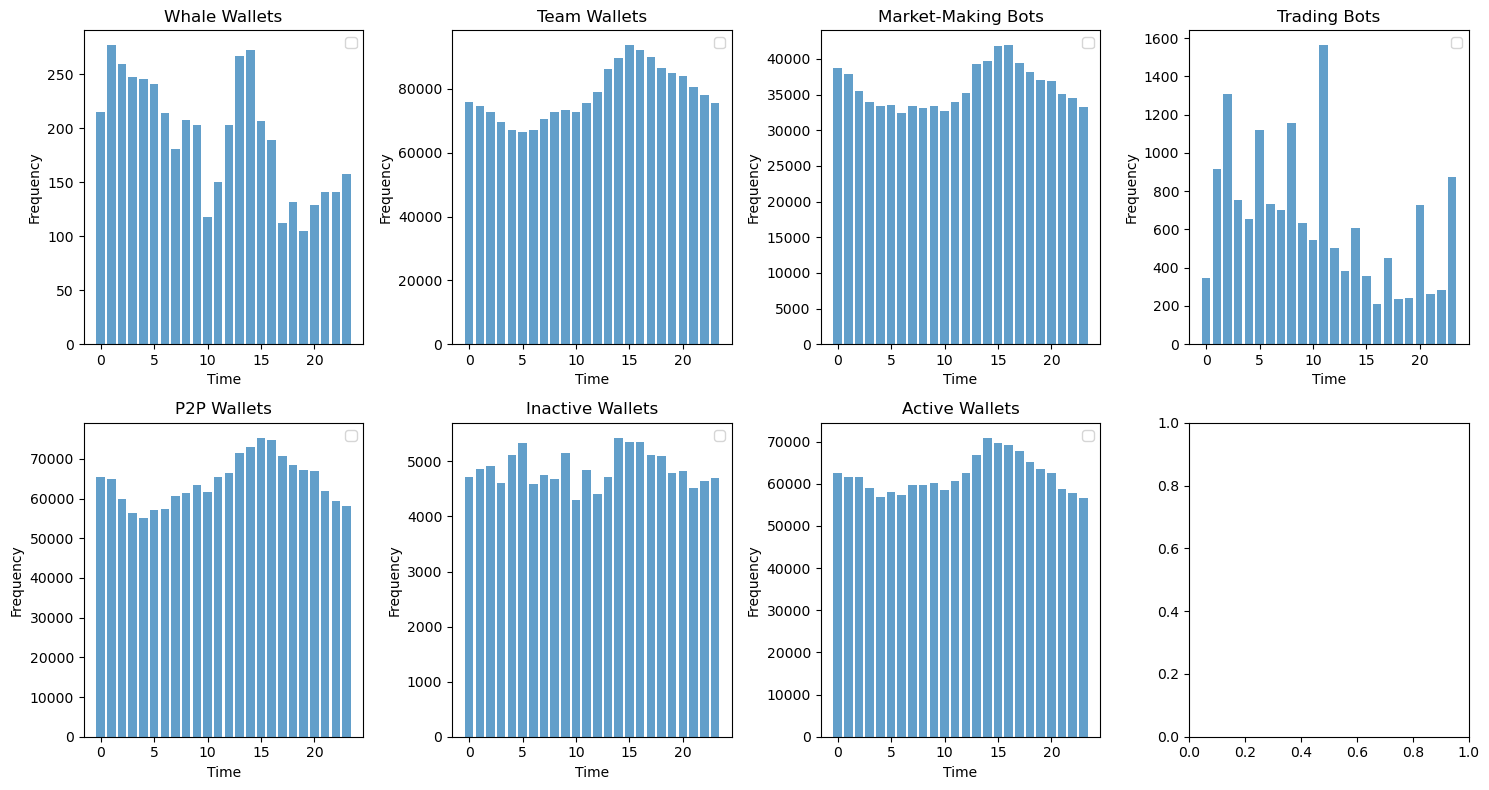

In [219]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Market-Making Bots', 'Trading Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes[0:-1]):
    sum_time_freq = [sum(x) for x in zip(*type_user_frequency[i]['time_frequency'])]
    ax.bar(hours, sum_time_freq, alpha=0.7)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i])
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [220]:
whale_user_interact = user_interact[user_interact['user'].isin(whale)]
big_team_user_interact = user_interact[user_interact['user'].isin(big_team)]
high_volume_bot_user_interact = user_interact[user_interact['user'].isin(high_volume_bot)]
low_volume_bot_user_interact = user_interact[user_interact['user'].isin(low_volume_bot)]
p2p_user_user_interact = user_interact[user_interact['user'].isin(p2p_user)]
inactive_user_user_interact = user_interact[user_interact['user'].isin(inactive_user)]
active_user_user_interact = user_interact[user_interact['user'].isin(active_user)]


whale_user_interact.head()

,user,other_user,count
index,,,
51722,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,0x0d0e3b00ff21605a39d1589537bda69ff6e5b990,1
51723,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,0x1e68238ce926dec62b3fbc99ab06eb1d85ce0270,1
51724,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,0x308b2c28256b97cbe240c784874768eb4b31fbf1,1
51725,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,0x514910771af9ca656af840dff83e8264ecf986ca,1
51726,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,1


In [221]:
type_user_interact = [whale_user_interact, big_team_user_interact, 
                        high_volume_bot_user_interact, low_volume_bot_user_interact, 
                        p2p_user_user_interact, inactive_user_user_interact, active_user_user_interact]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

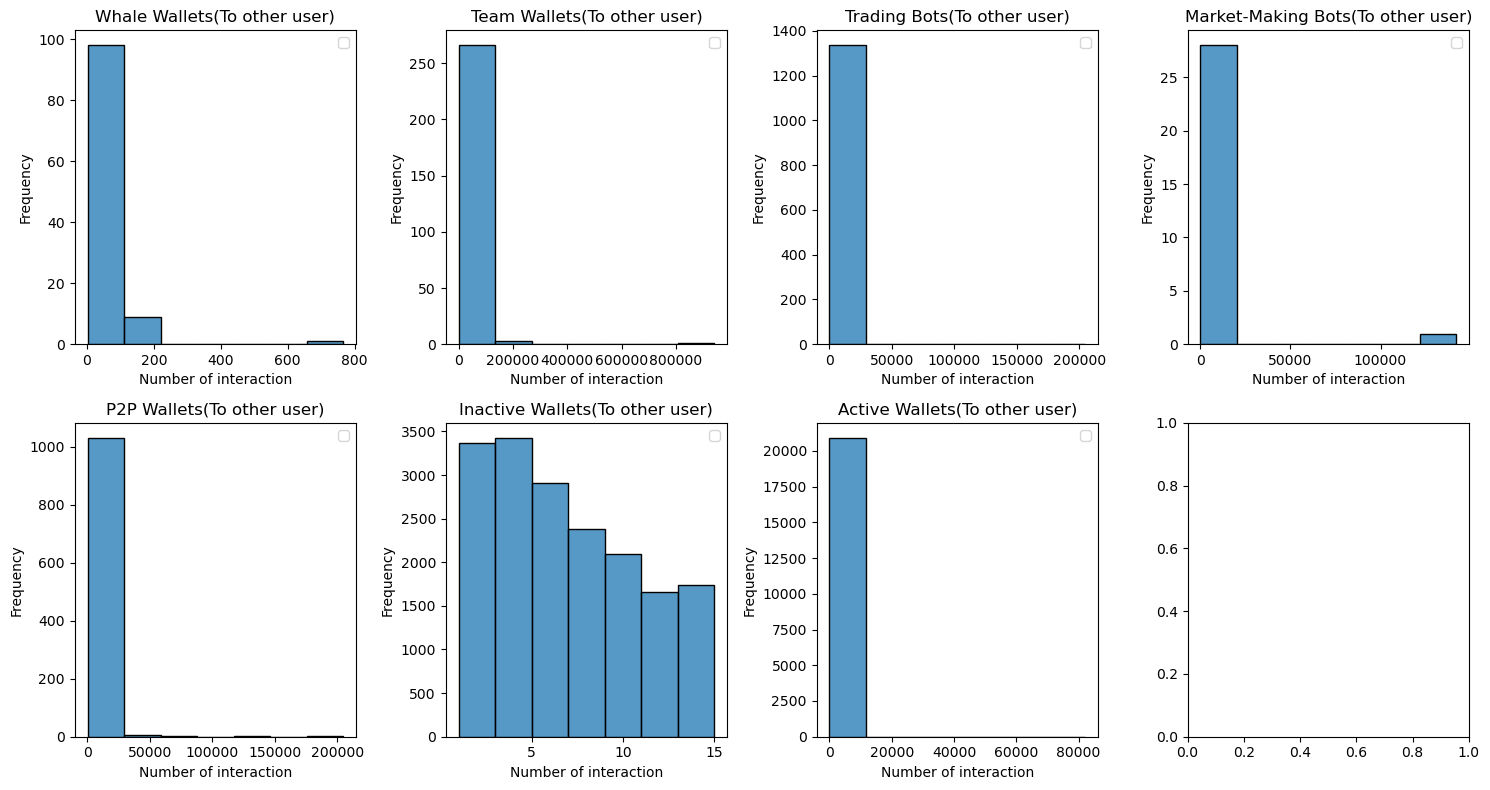

In [222]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Trading Bots', 'Market-Making Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes[0:-1]):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)
    subset_data = type_user_interact[i].groupby('user')['count'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['count'], bins =7, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i] + "(To other user)")
    ax.set_xlabel("Number of interaction")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [223]:
def mean_user_interaction(label):
    x = label.groupby('user')['count'].sum().reset_index()["count"].mean()
    return x

label_names = ['Whale Wallets', 'Team Wallets', 'Market-Making Bots', 'Trading Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

for idx, label in enumerate(type_user_interact):
    print(label_names[idx], "- Average number of interaction (to other users): ", mean_user_interaction(label))
    

Whale Wallets - Average number of interaction (to other users):  45.5
Team Wallets - Average number of interaction (to other users):  12353.488888888889
Market-Making Bots - Average number of interaction (to other users):  809.3736920777279
Trading Bots - Average number of interaction (to other users):  4978.448275862069
P2P Wallets - Average number of interaction (to other users):  2056.8339731285987
Inactive Wallets - Average number of interaction (to other users):  6.462942949775326
Active Wallets - Average number of interaction (to other users):  96.1846881268507
